<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/3Phase3dimensional3rdHarmonic_rotatedAroundZaxis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Unbalanced Three-Phase in 3D</h1></b>

Dr. Bingsen Wang

5/28/2025
</center>

#Python Code

0
0
50
100
150
200
250
300
350
400
450
500
550
0


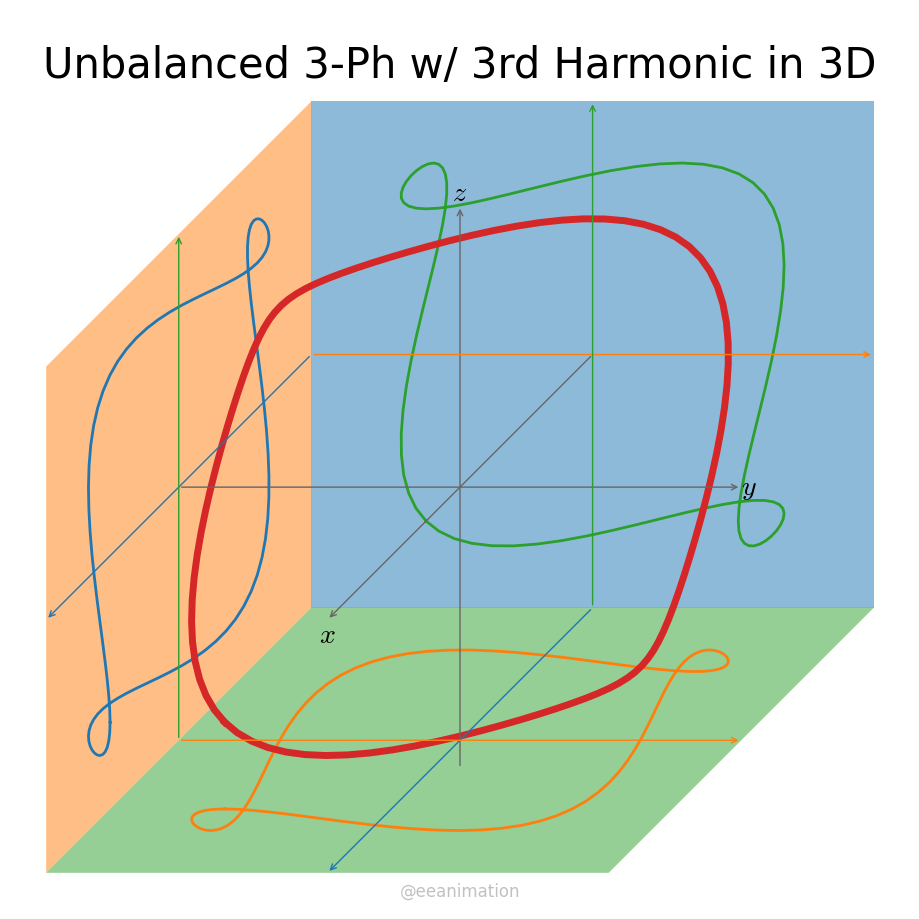

In [5]:
from matplotlib import pyplot,animation,cm,patches,path
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})
def qp(q1,q2): #quaternion product
  w1, x1, y1, z1 = q1
  w2, x2, y2, z2 = q2
  w = w1 * w2 - x1 * x2 - y1 * y2 - z1 * z2
  x = w1 * x2 + x1 * w2 + y1 * z2 - z1 * y2
  y = w1 * y2 - x1 * z2 + y1 * w2 + z1 * x2
  z = w1 * z2 + x1 * y2 - y1 * x2 + z1 * w2
  return np.array([w, x, y, z])
def qconj(q): #quaternion conjugate
  return np.array([q[0],-q[1],-q[2],-q[3]])
def qv(q,v): #quaternion rotation
  return qp(qp(q,v),qconj(q))
def qpad(v): #padding 3d vector into quaternion
  return np.pad(v,(1,0),'constant')
def d32(xyz):
  return np.array([xyz[1]-xyz[0]*np.sin(np.pi/4)/1.5,xyz[2]-xyz[0]*np.cos(np.pi/4)/1.5])

Nf=600
r=.37; h3=.3
xm,ym,zm=0.5,.5,.45
t=2*np.pi*np.linspace(0,1,Nf)
wt=2*np.pi*np.linspace(0,1,100)

x=r*(np.cos(wt)-h3*np.cos(3*wt))
y=r*(np.cos(wt-2*np.pi/3)-h3*np.cos(3*wt))
z=r*(np.cos(wt+2*np.pi/3)-h3*np.cos(3*wt))
cl = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]))
xlim=[-.8,.8];ylim=[-.75,.85]
ax = fig.add_axes([0,0,1,1],xlim=xlim,ylim=ylim,fc='none'); ax.axis('off')
ax.text(np.sum(xlim)/2,ylim[1]-.1, r'Unbalanced 3-Ph w/ 3rd Harmonic in 3D', size=30,ha='center',va='center')
p1=[d32((.5,0,0)),d32((0,.5,0)),d32((0,0,.5))]
[ax.annotate('',p1[k],-p1[k],arrowprops=dict(arrowstyle='->',lw=1,color='.4')) for k in range(3)] #x,y,z-axis
[ax.text(p1[k][0],p1[k][1],[r'$x$',r'$y$',r'$z$'][k],
         size=20,va=['top','center','bottom'][k],ha=['center','left','center'][k]) for k in range(3)]

verts1=[d32([-xm,-ym,zm]),d32([-xm,ym,zm]),d32([-xm,ym,-zm]),d32([-xm,-ym,-zm])]+[(0,0)] #y-z plane at x=-ym
verts2=[d32([xm,-ym,zm]),d32([-xm,-ym,zm]),d32([-xm,-ym,-zm]),d32([xm,-ym,-zm])]+[(0,0)] #x-z plane at y=-ym
verts3=[d32([xm,ym,-zm]),d32([-xm,ym,-zm]),d32([-xm,-ym,-zm]),d32([xm,-ym,-zm])]+[(0,0)] #x-y plane at z=-zm
codes=[path.Path.MOVETO]+[path.Path.LINETO]*3 + [path.Path.CLOSEPOLY]
[ax.add_patch(patches.PathPatch(path.Path([verts1,verts2,verts3][k],codes),ec='none',fc=cl[k],lw=2,joinstyle='round',alpha=.5,zorder=-3))for k in range(3)]
ax.annotate('',d32([xm,-ym,0]),d32([-xm,-ym,0]),arrowprops=dict(arrowstyle='->',lw=1,color=cl[0])) #x-axis at y=-ym
ax.annotate('',d32([0,-ym,zm]),d32([0,-ym,-zm]),arrowprops=dict(arrowstyle='->',lw=1,color=cl[2])) #z-axis at y=-ym

ax.annotate('',d32([-xm,ym,0]),d32([-xm,-ym,0]),arrowprops=dict(arrowstyle='->',lw=1,color=cl[1])) #y-axis at x=-xm
ax.annotate('',d32([-xm,0,zm]),d32([-xm,0,-zm]),arrowprops=dict(arrowstyle='->',lw=1,color=cl[2])) #z-axis at x=-xm

ax.annotate('',d32([xm,0,-zm]),d32([-xm,0,-zm]),arrowprops=dict(arrowstyle='->',lw=1,color=cl[0])) #x-axis at z=-zm
ax.annotate('',d32([0,ym,-zm]),d32([0,-ym,-zm]),arrowprops=dict(arrowstyle='->',lw=1,color=cl[1])) #y-axis at z=-zm
lines = [ax.plot([],[],c=cl[(k+2)%3],lw=2,alpha=1)[0] for k in range(3)]
lines += [ax.plot([],[],c=cl[3],lw=5,alpha=1)[0] ]
u0=np.array([0,0,0,1])
def animate(i):
  # i=60
  if i%50==0:    print(i)
  q=np.array([np.cos(t[i]/2)]+(np.sin(t[i]/2)*u0[1:]).tolist())
  pts_rot=np.transpose(np.array([qv(q,qpad(p))[1:] for p in zip(x,y,z)]))
  lxyz=d32(pts_rot)
  lxz=d32([pts_rot[0,:],pts_rot[1,:]*0-ym,pts_rot[2,:]])
  lyz=d32([pts_rot[0,:]*0-xm,pts_rot[1,:],pts_rot[2,:]])
  lxy=d32([pts_rot[0,:],pts_rot[1,:],pts_rot[2,:]*0-zm])
  [lines[k].set_data(*[lyz,lxz,lxy,lxyz][k]) for k in range(4)]
  return

ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size=12,c='.2',alpha=.3,ha='center',va='bottom')
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=20)
anim.save("3Phase3d3rd_rotation.mp4",writer=animation.FFMpegWriter(fps=60),dpi=200)